In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv('E:\Datasets\ITC.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-17,276.549988,282.500000,275.549988,279.100006,224.979813,4831017
1,2017-04-18,280.200012,284.000000,278.100006,279.049988,224.939514,4330981
2,2017-04-19,281.149994,281.500000,277.850006,278.700012,224.657410,4952956
3,2017-04-20,279.700012,281.500000,278.350006,279.500000,225.302277,4237611
4,2017-04-21,282.000000,282.000000,272.700012,274.350006,221.150909,8706432
...,...,...,...,...,...,...,...
1478,2023-04-06,386.649994,390.299988,384.200012,387.350006,387.350006,12897667
1479,2023-04-10,387.350006,390.000000,384.750000,388.549988,388.549988,6783022
1480,2023-04-11,388.549988,398.100006,388.000000,396.000000,396.000000,18237451
1481,2023-04-12,397.750000,397.799988,392.100006,393.549988,393.549988,9747526


In [4]:
df.shape

(1483, 7)

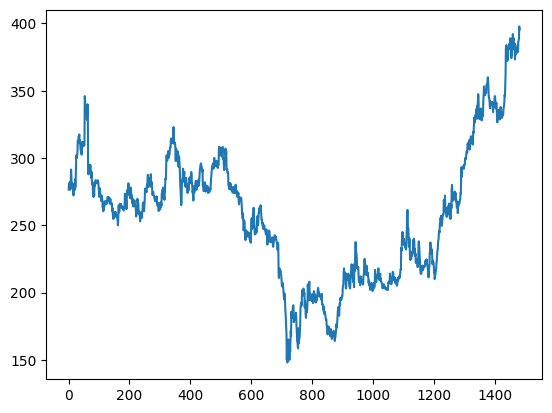

In [5]:
open = df['Open']
plt.plot(open)

In [6]:
ods = open.values

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_ods = scaler.fit_transform(np.array(ods).reshape(-1,1))
scaled_ods

array([[0.51471467],
       [0.52932938],
       [0.53313311],
       ...,
       [0.96316312],
       [1.        ],
       [0.99099099]])

In [8]:
len(scaled_ods), len(ods)

(1483, 1483)

In [9]:
train_ods, test_ods = train_test_split(scaled_ods, test_size = 0.2)
train_ods,test_ods

(array([[0.47407405],
        [0.63663664],
        [0.3003003 ],
        ...,
        [0.57857858],
        [0.26126126],
        [0.38838839]]),
 array([[0.25185183],
        [0.60860861],
        [0.4522523 ],
        [0.20580578],
        [0.65665666],
        [0.64864865],
        [0.36276279],
        [0.73313316],
        [0.3747748 ],
        [0.49249249],
        [0.58018016],
        [0.53313311],
        [0.49809807],
        [0.75775776],
        [0.38438438],
        [0.15095094],
        [0.32772775],
        [0.7475476 ],
        [0.45085087],
        [0.78518521],
        [0.44484487],
        [0.13213213],
        [0.25625626],
        [0.93693694],
        [0.15695694],
        [0.24824825],
        [0.60080075],
        [0.90890891],
        [0.4964965 ],
        [0.19419419],
        [0.73673674],
        [0.6006006 ],
        [0.13553556],
        [0.25705705],
        [0.47247247],
        [0.3855856 ],
        [0.09489488],
        [0.30050051],
        [0.288288

In [10]:
def create_ds(dataset, time_step):
    xtrain, ytrain = [], []
    for i in range (len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        xtrain.append(a)
        ytrain.append(dataset[i+time_step,0])
    return np.array(xtrain), np.array(ytrain)

In [11]:
time_step = 100
x_train,y_train = create_ds(train_ods,time_step)
x_test, y_test = create_ds(test_ods, time_step)

In [12]:
x_train.shape, y_train.shape

((1085, 100), (1085,))

In [13]:
x_test.shape, y_test.shape

((196, 100), (196,))

In [14]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_test.shape, x_train.shape

((196, 100, 1), (1085, 100, 1))

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100, return_sequences=True, input_shape = (x_train.shape[1], 1)),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(1, activation='linear')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 100)          40800     
                                                                 
 lstm_10 (LSTM)              (None, 100, 100)          80400     
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)

In [28]:
history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
17/17 [==============================] - 26s 912ms/step - loss: 0.0697 - val_loss: 0.0460
Epoch 2/10
17/17 [==============================] - 12s 729ms/step - loss: 0.0421 - val_loss: 0.0426
Epoch 3/10
17/17 [==============================] - 13s 801ms/step - loss: 0.0412 - val_loss: 0.0431
Epoch 4/10
17/17 [==============================] - 15s 878ms/step - loss: 0.0416 - val_loss: 0.0424
Epoch 5/10
17/17 [==============================] - 15s 877ms/step - loss: 0.0413 - val_loss: 0.0460
Epoch 6/10
17/17 [==============================] - 15s 886ms/step - loss: 0.0410 - val_loss: 0.0424
Epoch 7/10
17/17 [==============================] - 17s 982ms/step - loss: 0.0409 - val_loss: 0.0421
Epoch 8/10
17/17 [==============================] - 16s 924ms/step - loss: 0.0408 - val_loss: 0.0428
Epoch 9/10
17/17 [==============================] - 17s 992ms/step - loss: 0.0417 - val_loss: 0.0429
Epoch 10/10
17/17 [==============================] - 15s 880ms/step - loss: 0.0410 - val_lo

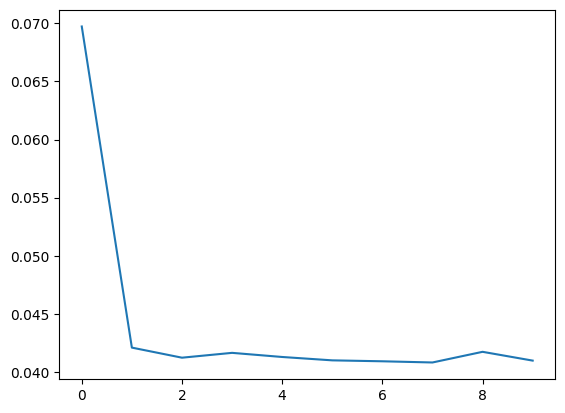

In [29]:
loss = model.history.history['loss']
plt.plot(loss)